In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [3]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=4)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, num_workers=4)

In [4]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [5]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

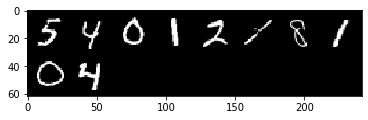

tensor([5, 4, 0, 1, 2, 1, 8, 1, 0, 4])


In [6]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(labels)

In [23]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = NN()
net.to(device)

NN(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [25]:
%%time
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.836
[1,  4000] loss: 0.377
[1,  6000] loss: 0.331
[2,  2000] loss: 0.291
[2,  4000] loss: 0.273
[2,  6000] loss: 0.243
[3,  2000] loss: 0.227
[3,  4000] loss: 0.208
[3,  6000] loss: 0.206
[4,  2000] loss: 0.189
[4,  4000] loss: 0.173
[4,  6000] loss: 0.171
[5,  2000] loss: 0.153
[5,  4000] loss: 0.156
[5,  6000] loss: 0.144
[6,  2000] loss: 0.130
[6,  4000] loss: 0.132
[6,  6000] loss: 0.131
[7,  2000] loss: 0.117
[7,  4000] loss: 0.120
[7,  6000] loss: 0.109
[8,  2000] loss: 0.102
[8,  4000] loss: 0.103
[8,  6000] loss: 0.104
[9,  2000] loss: 0.093
[9,  4000] loss: 0.094
[9,  6000] loss: 0.090
[10,  2000] loss: 0.087
[10,  4000] loss: 0.085
[10,  6000] loss: 0.081
Finished Training
Wall time: 3min 42s


In [26]:
correct = 0
total = 0
#net.to('cpu')
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %
